# Q1. What are the key features of the wine quality data set? Discuss the importance of each feature in predicting the quality of wine.

Your updated code is more appropriate for a regression task, and it correctly separates the features (X) and the target variable (y) before splitting the data and fitting a linear regression model. Now, let's discuss the key features of the wine quality dataset and their importance in predicting the quality of wine:

The wine quality dataset typically contains several features that can be used to predict the quality of wine. These features can include both chemical and physical properties of the wine. While I don't have access to the specific dataset you're using, I can provide a general idea of some common features in such a dataset and their importance:

1. **Fixed Acidity:** This feature represents the amount of non-volatile acids in the wine. It can influence the taste and stability of the wine. Higher levels of fixed acidity might contribute to a more tart or sour taste.

2. **Volatile Acidity:** Volatile acidity refers to the presence of volatile acids in the wine, primarily acetic acid. Excessive volatile acidity can lead to off-flavors and spoil the wine's quality.

3. **Citric Acid:** Citric acid can contribute to the wine's freshness and add a citrusy flavor. It's generally desirable in moderate amounts.

4. **Residual Sugar:** This feature indicates the amount of sugar left in the wine after fermentation. It can affect the wine's sweetness and balance. Some wines are sweeter than others, and this feature can capture that variation.

5. **Chlorides:** Chlorides can come from various sources, including the soil and winemaking process. Higher chloride levels can affect the wine's taste and mouthfeel. It's usually desirable in limited quantities.

6. **Free Sulfur Dioxide:** Sulfur dioxide is used as a preservative in winemaking. The free form is more effective at protecting against oxidation and microbial spoilage. It plays a crucial role in wine stability.

7. **Total Sulfur Dioxide:** This is the total amount of sulfur dioxide in the wine, including both the free and bound forms. High levels can be problematic, as excessive sulfur dioxide can lead to off-flavors.

8. **Density:** Density can be an indicator of the wine's alcohol content. It is related to the sugar content and can impact the wine's body and mouthfeel.

9. **pH:** pH measures the acidity or alkalinity of the wine. It influences the wine's overall balance and can affect how the other components are perceived.

10. **Alcohol:** The alcohol content of the wine is usually measured in percentage. It can influence the wine's body, flavor, and perceived warmth.

11. **Sulphates:** Sulphates are a type of salt, and they can contribute to the wine's aroma and flavor. In appropriate amounts, they are considered beneficial.

12. **Quality:** This is the target variable you're trying to predict. It represents the overall quality of the wine, typically on a scale. It's subjective and often determined by expert tasters.

Each of these features can have a different impact on wine quality, and their importance may vary depending on the specific dataset and wine production process. The linear regression model you're using attempts to learn the relationships between these features and wine quality, allowing it to make predictions based on the given data. The accuracy score you print at the end of your code is a measure of how well the model can predict wine quality based on the features provided.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model

df = pd.read_csv('winequality-red.csv')

df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

df = pd.read_csv('winequality-red.csv')

model = linear_model.LinearRegression()

x = df.drop(columns=['quality'])
y = df['quality']

x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=0.2)

model.fit(x_train,y_train)

prediction = model.predict(x_test)

r_squared = r2_score(y_test, prediction)
print("R-squared:", r_squared)


R-squared: 0.38429214802562695


# Q2. How did you handle missing data in the wine quality data set during the feature engineering process? Discuss the advantages and disadvantages of different imputation techniques.

1. Removing Rows with Missing Values (Listwise Deletion):

Advantages: Simple and easy to implement. Removes problematic data points.
Disadvantages: Can lead to a significant loss of data, especially if many rows have missing values. May introduce bias if missing data is not random.

In [9]:
df_cleaned = df.dropna()
df_cleaned

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


2. Mean/Median Imputation:

Advantages: Simple and preserves the data structure. Useful when missing data is missing at random and not too many missing values.
Disadvantages: Can introduce bias if data is not missing at random. Does not account for correlations between features.

In [10]:
df_imputed_mean = df.fillna(df.mean())
df_imputed_mean

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


3. Mode Imputation (for Categorical Data):

Advantages: Suitable for categorical data. Preserves the data structure.
Disadvantages: May introduce bias if the mode is not representative. Does not consider correlations between features.

In [11]:
df_imputed_mode = df.fillna(df.mode().iloc[0])
df_imputed_mode

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


4. Interpolation Methods:

Advantages: Can be used for time-series data or when missing data follows a pattern.
Disadvantages: Requires understanding of data patterns. May not be suitable for all datasets.

In [12]:
df.interpolate(method='linear' , inplace=True)

# Q3. What are the key factors that affect students' performance in exams? How would you go about analyzing these factors using statistical techniques?

Key Factors Affecting Students' Performance:

Study Time: The amount of time students allocate to studying can significantly impact their exam performance.

Prior Knowledge: Students' existing knowledge and understanding of the subject matter play a crucial role in their performance.

Learning Resources: Access to textbooks, educational materials, and online resources can affect students' ability to prepare for exams.

Teaching Quality: The effectiveness of teaching methods and the quality of instructors can influence student learning.

Attendance: Regular attendance in classes and engagement with course materials can positively impact performance.

Health and Well-being: Physical and mental health can affect a student's ability to concentrate and perform well in exams.

Motivation: Intrinsic motivation, such as interest in the subject matter or long-term educational goals, can drive students to excel.

Socioeconomic Background: Socioeconomic factors, including family income and parental education, can influence access to resources and support for learning.

Peer Influence: Interaction with peers and study groups can affect learning outcomes

Analyzing These Factors Using Statistical Techniques:

Data Collection: Gather data on students' performance and relevant factors. This may involve surveys, academic records, attendance records, and other sources of information.

Data Preprocessing: Clean and prepare the data. Handle missing values, outliers, and categorize variables if necessary.

Descriptive Statistics: Use summary statistics (mean, median, standard deviation) to get an initial understanding of the data.

Exploratory Data Analysis (EDA): Conduct EDA to explore relationships between factors and performance. Use techniques like scatter plots, box plots, histograms, and correlation matrices to identify patterns.

Hypothesis Testing: Perform hypothesis tests to determine whether certain factors have a statistically significant impact on students' performance. For example, you can use t-tests or ANOVA to compare the means of different groups.

Regression Analysis: Use regression models to quantify the relationships between factors and student performance. Multiple linear regression or logistic regression can be used depending on whether the outcome is continuous (e.g., exam scores) or categorical (e.g., pass/fail).

Machine Learning: Consider applying machine learning algorithms for predictive modeling. Techniques like decision trees, random forests, or neural networks can help identify complex relationships between factors and predict student performance.

Causal Inference: If you want to establish causal relationships, consider experimental designs or quasi-experimental methods like propensity score matching.

Cluster Analysis: Group students into clusters based on similar characteristics to understand how different factors affect performance within each cluster.

Data Visualization: Create visualizations, such as heatmaps or bar charts, to communicate findings effectively.

Interpretation and Reporting: Interpret the statistical results in the context of education and present actionable insights to educators and policymakers.

Validation and Replication: Validate the findings on independent datasets if available and consider replication studies to ensure the robustness of the results.

Analyzing factors affecting students' performance is a multidisciplinary effort that combines statistical analysis, educational research, and domain expertise to provide

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [18]:
data = pd.read_csv('stud.csv')
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [19]:
data.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [20]:
mean = data.mean()
median = data.median()
mode = data.mode()

print('mean' , mean)
print('median' , median)
print("mode",mode)

mean math_score       66.089
reading_score    69.169
writing_score    68.054
dtype: float64
median math_score       66.0
reading_score    70.0
writing_score    69.0
dtype: float64
mode    gender race_ethnicity parental_level_of_education     lunch  \
0  female        group C                some college  standard   

  test_preparation_course  math_score  reading_score  writing_score  
0                    none          65             72             74  


In [22]:
data['Total_score'] = data['math_score'] + data['reading_score'] + data['writing_score']

In [23]:
data.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247


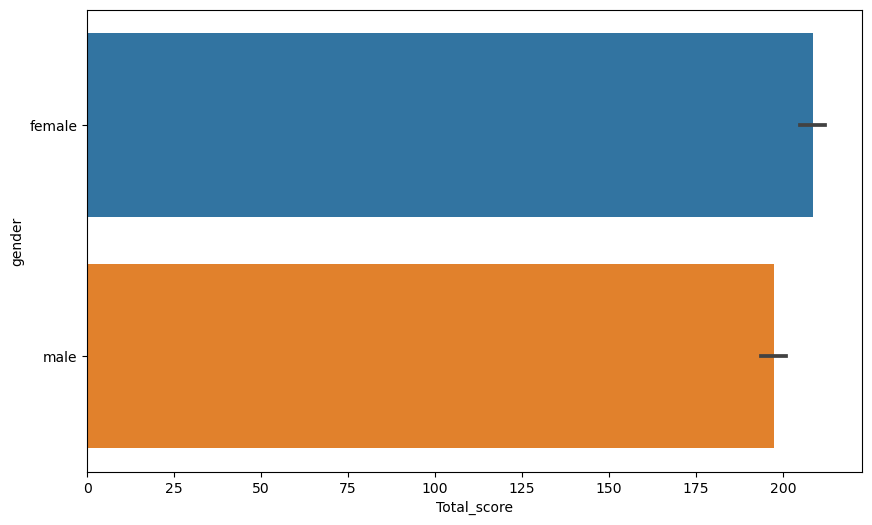

In [27]:
plt.figure(figsize=(10,6))
sns.barplot(data=data , x = 'Total_score' , y = 'gender')
plt.show()

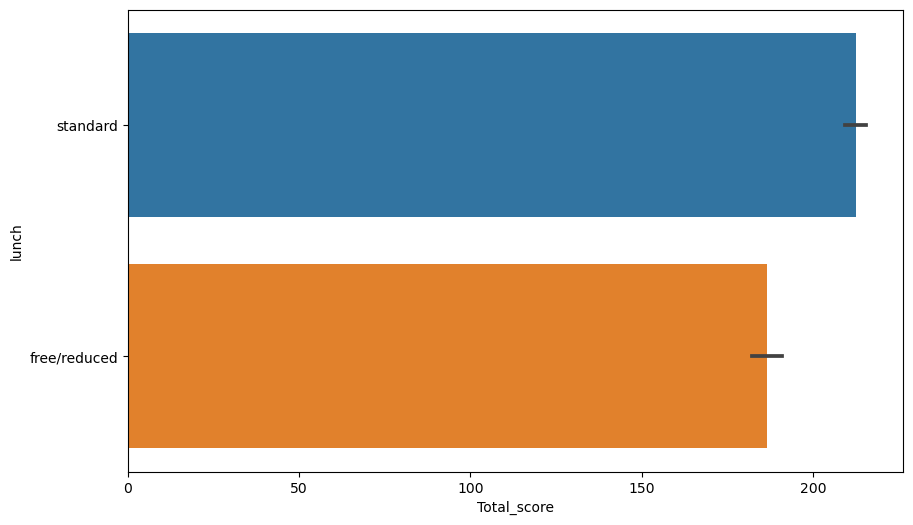

In [30]:
plt.figure(figsize=(10,6))
sns.barplot(data=data , x = 'Total_score' , y = 'lunch')
plt.show()

# Q4. Describe the process of feature engineering in the context of the student performance data set. How did you select and transform the variables for your model?

Feature engineering is a crucial step in the machine learning pipeline, where you select and transform the variables (features) in your dataset to make them more suitable for modeling. In the context of the student performance dataset, the goal is to prepare the data in a way that improves the performance of predictive models. Here's a general process of feature engineering for this dataset:

**1. Data Understanding:**
   - Begin by understanding the dataset thoroughly. Examine the variables (features) and their meanings.

**2. Handle Categorical Variables:**
   - Identify categorical variables, such as "gender" or "parental education," and convert them into numerical form. Common techniques include one-hot encoding or label encoding.
   - Example: Convert "gender" (categorical) into binary numerical values (0 or 1).

**3. Create New Features:**
   - Consider creating new features that might provide valuable information for prediction. These features can be derived from existing ones.
   - Example: Create a "total study time" feature by summing "studytime" and "failures" features.

**4. Binning or Discretization:**
   - For continuous variables, consider binning or discretizing them into categories. This can simplify relationships and capture non-linear patterns.
   - Example: Convert "age" into age groups (e.g., "young," "teen," "adult").

**5. Handling Missing Data:**
   - Decide how to handle missing data in the dataset. Depending on the amount of missing data, you can remove rows, impute missing values using techniques like mean, median, or more advanced imputation methods.

**6. Scaling and Normalization:**
   - Scale or normalize numerical features if necessary. Some machine learning algorithms are sensitive to feature scales, and scaling can improve model performance.
   - Example: Use Min-Max scaling to scale numerical features to a specific range (e.g., 0 to 1).

**7. Feature Selection:**
   - Use techniques like correlation analysis, feature importance from tree-based models, or domain knowledge to select the most relevant features for your model.
   - Eliminate features that don't contribute significantly to prediction.

**8. Feature Interaction:**
   - Explore interactions between features and create interaction terms if it makes sense in the context of your problem.
   - Example: Create an interaction term between "study time" and "school support" if you believe the combination has a significant impact on performance.

**9. Addressing Skewness and Outliers:**
   - Examine the distribution of numerical features. If they are highly skewed or contain outliers, consider transforming them (e.g., log transformation) or using robust models that are less sensitive to outliers.

**10. Dimensionality Reduction:**
    - If you have a large number of features and you're facing issues with computational complexity or overfitting, consider dimensionality reduction techniques like Principal Component Analysis (PCA) or feature selection methods.

**11. Feature Engineering Iteration:**
    - Feature engineering is often an iterative process. You may need to revisit and refine your feature engineering steps based on model performance and insights gained during model building.

**12. Model Evaluation:**
    - Evaluate your machine learning models using appropriate evaluation metrics to assess how well your feature engineering choices contribute to predictive performance.

Feature engineering is both an art and a science, and it requires domain expertise and creativity. It's important to continuously iterate and experiment with different feature engineering techniques to achieve the best results for your specific prediction task with the student performance dataset.

# Q5. Load the wine quality data set and perform exploratory data analysis (EDA) to identify the distribution of each feature. Which feature(s) exhibit non-normality, and what transformations could be applied to these features to improve normality?

Skewness of Features:
fixed acidity           0.981829
volatile acidity        0.670962
citric acid             0.318039
residual sugar          4.536395
chlorides               5.675017
free sulfur dioxide     1.249394
total sulfur dioxide    1.514109
density                 0.071221
pH                      0.193502
sulphates               2.426393
alcohol                 0.860021
quality                 0.217597
dtype: float64

Features with Significant Skewness:
Index(['residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'sulphates'],
      dtype='object')


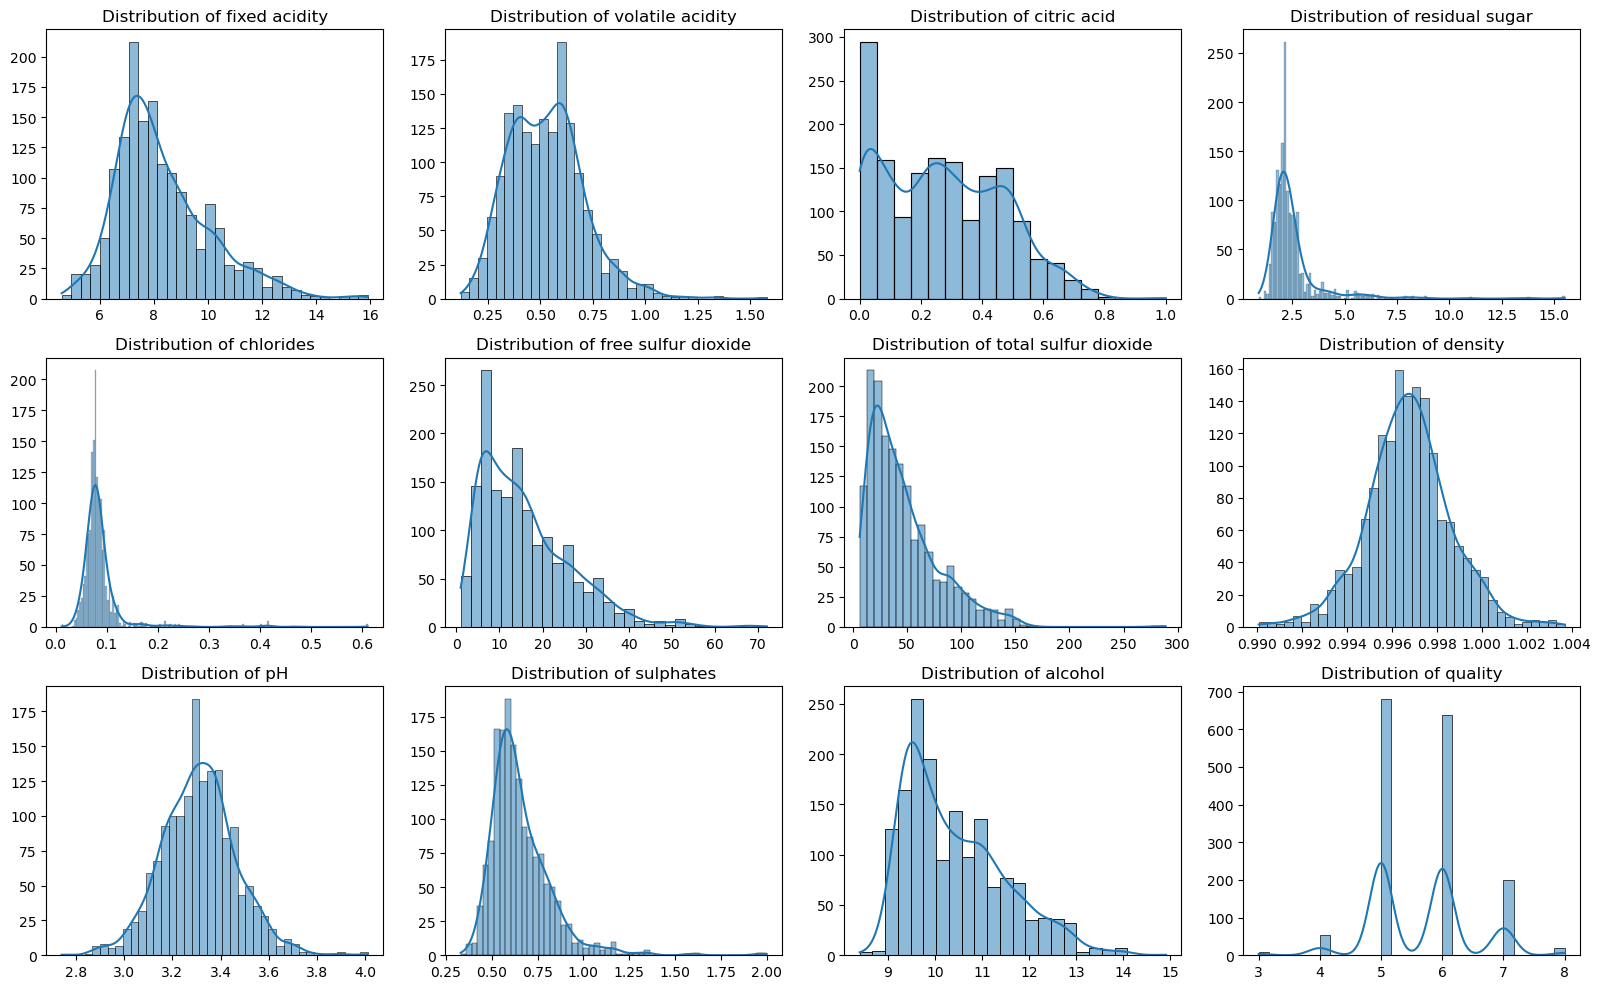

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


wine_data = pd.read_csv('winequality-red.csv')
numerical_features = wine_data.select_dtypes(include=['int64' , 'float64']).columns

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 10))
plt.subplots_adjust(wspace=0.5)

for i, feature in enumerate(numerical_features):
    row, col = i // 4, i % 4
    ax = axes[row, col]
    sns.histplot(wine_data[feature], kde=True, ax=ax)
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel('')
    ax.set_ylabel('')
    
plt.tight_layout()

skewness = wine_data[numerical_features].apply(lambda x: stats.skew(x))
print("Skewness of Features:")
print(skewness)


skewed_features = skewness[abs(skewness) > 1].index

print("\nFeatures with Significant Skewness:")
print(skewed_features)

# Q6. Using the wine quality data set, perform principal component analysis (PCA) to reduce the number of features. What is the minimum number of principal components required to explain 90% of the variance in the data?

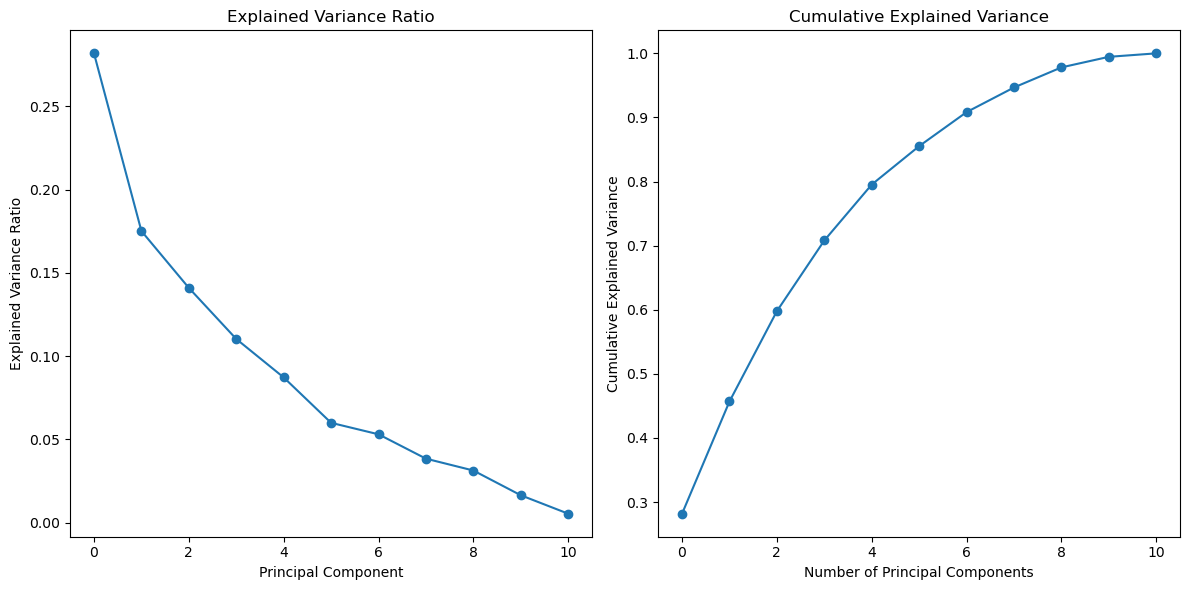

Minimum number of principal components to explain 90% of variance: 7


In [42]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the wine quality dataset
wine_data = pd.read_csv('winequality-red.csv')

# Separate features (X) and target variable (y)
X = wine_data.drop(columns=['quality'])
y = wine_data['quality']

# Standardize the features (important for PCA)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
n_components_90_variance = np.argmax(cumulative_explained_variance >= 0.90) + 1

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(explained_variance_ratio, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio')

plt.subplot(1, 2, 2)
plt.plot(cumulative_explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')

plt.tight_layout()
plt.show()

print("Minimum number of principal components to explain 90% of variance:", n_components_90_variance)
